In [1]:
import numpy as np
import pandas as pd
import sklearn.svm
import seaborn as sns
import scipy.io as sio
import matplotlib.pyplot as plt

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [2]:
mat = sio.loadmat('./data/ex6data1.mat')
print(mat.keys())
data = pd.DataFrame(mat.get('X'),columns=['X1','X2'])
data['y'] = mat.get('y')
data.head()


dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


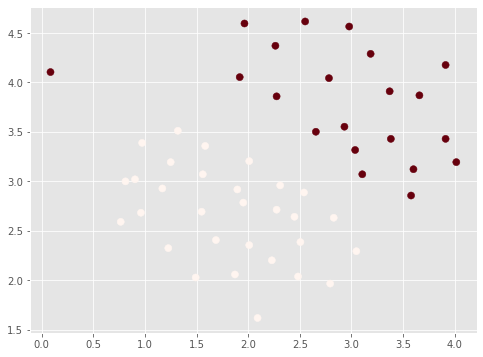

In [5]:
plt.style.use('ggplot')
fig,ax= plt.subplots(figsize = (8,6))
ax.scatter(data['X1'],data['X2'],s=50,c = data['y'],cmap='Reds')
plt.show()

In [6]:
svc1 = sklearn.svm.LinearSVC(C=1,loss='hinge')
svc1.fit(data[['X1','X2']],data['y'])
svc1.score(data[['X1','X2']],data['y'])

D:\Users\HAYLEY\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9803921568627451

In [8]:
data['SVM1 Confidence'] = svc1.decision_function(data[['X1','X2']])
data.head()

,X1,X2,y,SVM1 Confidence
0,1.9643,4.5957,1,0.800473
1,2.2753,3.8589,1,0.382535
2,2.9781,4.5651,1,1.375324
3,2.9320,3.5519,1,0.520282
4,3.5772,2.8560,1,0.333500


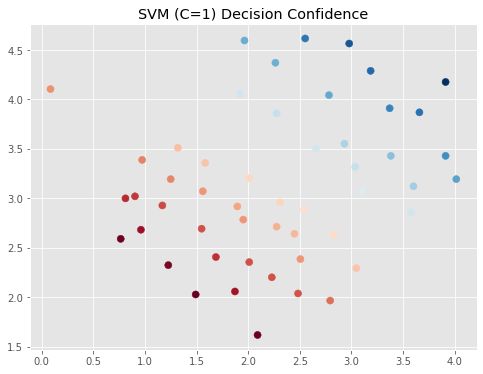

In [9]:
fig,ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'],data['X2'],s=50,c=data['SVM1 Confidence'],cmap='RdBu')
ax.set_title('SVM (C=1) Decision Confidence')
plt.show()

In [ ]:
# try C=100

### 高斯核函数

In [10]:
def gaussian_kernel(x1,x2,sigma):
    return np.exp(-np.power(x1-x2,2).sum()/(2*(sigma**2)))

In [11]:
mat = sio.loadmat('./data/ex6data2.mat')
print(mat.keys())
data = pd.DataFrame(mat.get('X'),columns=['X1','X2'])
data['y'] = mat.get('y')
data.head()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


In [12]:
data.shape

(863, 3)

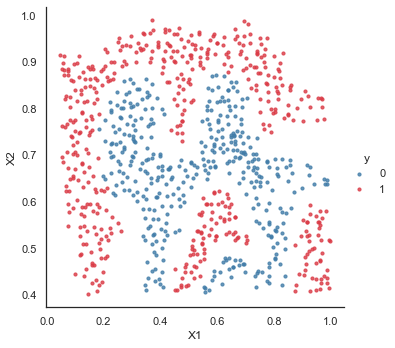

In [14]:
sns.set(context='notebook',style='white',palette = sns.diverging_palette(240,10,n=2))
sns.lmplot('X1','X2',hue='y',data=data,height=5,fit_reg=False,scatter_kws={'s':10})
plt.show()

In [15]:
svc = sklearn.svm.SVC(C=100,kernel='rbf',gamma=10,probability=True)
svc

SVC(C=100, gamma=10, probability=True)

In [16]:
svc.fit(data[['X1','X2']],data['y'])
svc.score(data[['X1','X2']],data['y'])

0.9698725376593279

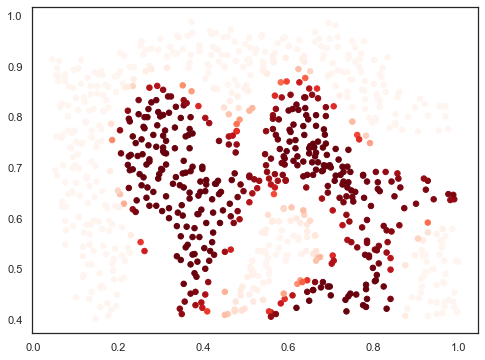

In [17]:
predict_prob = svc.predict_proba(data[['X1','X2']])[:,0]
fig,ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'],data['X2'],s=30,c=predict_prob,cmap='Reds')
plt.show()

### 调参

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [23]:
mat = sio.loadmat('./data/ex6data3.mat')
print(mat.keys())
training = pd.DataFrame(mat.get('X'),columns=['X1','X2'])
training['y'] = mat.get('y')
cv = pd.DataFrame(mat.get('Xval'),columns=['X1','X2'])
cv['y'] = mat.get('yval')

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])


In [24]:
print(training.shape)
training.head()

(211, 3)


,X1,X2,y
0,-0.158986,0.423977,1
1,-0.347926,0.470760,1
2,-0.504608,0.353801,1
3,-0.596774,0.114035,1
4,-0.518433,-0.172515,1


In [22]:
print(cv.shape)
cv.head()

(200, 3)


,X1,X2,y
0,-0.353062,-0.673902,0
1,-0.227126,0.447320,1
2,0.092898,-0.753524,0
3,0.148243,-0.718473,0
4,-0.001512,0.162928,0


In [25]:
candidate = [0.01,0.03,0.1,0.3,1,3,10,30,100]
combination = [(C,gamma) for C in candidate for gamma in candidate]
len(combination)

81

In [26]:
search = []
for C,gamma in combination:
    svc = sklearn.svm.SVC(C=C,gamma=gamma)
    svc.fit(training[['X1','X2']],training['y'])
    search.append(svc.score(cv[['X1','X2']],cv['y']))

In [27]:
best_score = search[np.argmax(search)]
best_param = combination[np.argmax(search)]
print(best_score,best_param)

0.965 (0.3, 100)


In [28]:
best_svc = sklearn.svm.SVC(C=100,gamma=0.3)
best_svc.fit(training[['X1','X2']],training['y'])
ypred = best_svc.predict(cv[['X1','X2']])
print(metrics.classification_report(cv['y'],ypred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       113
           1       0.94      0.89      0.91        87

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200



# sklearn `GridSearchCV` （网格搜索）
http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html#sklearn.grid_search.GridSearchCV

In [29]:
parameters = {'C':candidate,'gamma':candidate}
svc = sklearn.svm.SVC()
clf = GridSearchCV(svc,parameters,n_jobs=1)
clf.fit(training[['X1', 'X2']], training['y'])

GridSearchCV(estimator=SVC(), n_jobs=1,
             param_grid={'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100],
                         'gamma': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]})

In [30]:
clf.best_params_

{'C': 30, 'gamma': 3}

In [31]:
clf.best_score_

0.9194905869324475

In [32]:
ypred = clf.predict(cv[['X1', 'X2']])
print(metrics.classification_report(cv['y'], ypred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       113
           1       0.95      0.93      0.94        87

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

